## Introducción

El siguiente proyecto está orientado a la utilización del análisis de datos, ciencia de datos y Machine Learning para estudiar, analizar, procesar un conjunto de datos basado en un historial de ventas. Con la utilización de estos datos y su naturaleza se pueden proponer varias soluciones utilizando Machine Learing orientadas a la segmentación de clientes:

Se pueden utilizar algoritmos de clustering (K-means o DBSCAN) para agrupar a los clientes en diferentes segmentos basados en sus características demográficas y de gasto. Con esta solución se comprende mejor las diferentes características de los clientes y adaptar estrategias de marketing y ventas para cada segmento. También se pudiera realizar análisis adicionales para comprender mejor las características y comportamiento de cada segmento y así poder personalizar las estrategias de marketing y ventas de manera más efectiva.

In [1]:
# Módulos para recibir y preprocesar los datos
import pandas as pd
import numpy as np

In [2]:
# Obteniendo el dataset
def get_dataset():
    return pd.read_csv("sales_data_sample.csv",
                       encoding='ISO-8859-1')

customers = get_dataset()
customers.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Características del conjunto de datos
**ORDERNUMBER:** Número de identificación de la orden. Puede estar asociada a múltiples interacciones.
**QUANTITYORDERED:** Cantidad de productos que se han ordenado.
**PRICEEACH:** Precio de cada producto.
**ORDERLINENUMBER:** Número de línea de la orden.
**SALES:** Ingresos generados por la venta. El valor de este campo está determinado por la multiplicación de QUANTITYORDERED por PRICEEACH.
**ORDERDATE:** Fecha y hora en que se realizó la orden.
**STATUS:** Estado del envío de la orden (ej. "Enviado").
**QTR_ID:** Identificador del trimestre del año en que se realizó la orden.
**MONTH_ID:** Identificador del mes en que se realizó la orden.
**YEAR_ID:** Año en que se realizó la orden.
**ADDRESSLINE1:** Primera línea de la dirección del cliente.
**ADDRESSLINE2:** Segunda línea de la dirección del cliente (puede estar vacía).
**CITY:** Ciudad del cliente.
**STATE:** Estado o región del cliente.
**POSTALCODE:** Código postal del cliente.
**COUNTRY:** País del cliente.
**TERRITORY:** Territorio del cliente (puede estar vacío).
**CONTACTLASTNAME:** Apellido del contacto del cliente.
**CONTACTFIRSTNAME:** Nombre del contacto del cliente.
**DEALSIZE:** Tamaño de la transacción (ej. "Pequeño", "Mediano").

In [3]:
customers.shape

(2823, 25)

Dado el número elevado de ventas totales realizadas se va a aplicar la técnica **RFM** (Recency, Frecuency, Monetary value) para agregar nuevas características al dataset.

**Recency (Recencia):** Tiempo que ha pasado desde la última interacción o compra del cliente Es una medida de la actividad más reciente del cliente.

**Frecuency (Frecuencia):** La frecuencia con la que el cliente interactúa, compra o realiza una transacción. Es una medida de la actividad histórica del cliente.

**Monetary value (Valor monetario):** Se refiere al valor monetario o importe total gastado por un cliente dentro de un periodo de tiempo determinado. Es una medida del valor que aporta el cliente a la empresa.

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
customers.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


En la inspección de las columnas del dataset se aprecia que existen valores perdidos (NaN) en las columnas ADDRESSLINE2, STATE, POSTALCODE y TERRITORY.

En la inspección de la descripción de las columnas numéricas del dataset se observa que no existen valores atípicos ni negativos, por lo tanto no hay valores que puedan afectar la calidad del modelo.

# Feature engineering
### Aplicación de la técnica RFM
Se procede a construir un nuevo DataFrame con los siguientes valores:
   - Recency:
      - Baja: significa que el cliente ha tenido una interacción o realizado un pedido recientemente
      - Alta: significa ha pasado mucho tiempo desde la última interacción o pedido del cliente
   - Frecuency:
      - Baja: significa que el cliente ha tenido poca activiad histórica en la realización de compras o pedidos.
      - Alta: significa que el cliente ha tenido mucha actividad histórica en la realización de compras o pedidos.
   - Monetary value:
      - Bajo: significa que el cliente ha tenido poco aporte monetario en las ventas de la empresa.
      - Alto: significa que el cliente ha tenido un alto aporte monetario en las ventas de la empresa.
   - Customer name: identificador del cliente.

## Recencia

In [6]:
# Se convierte la columna ORDERDATE al formato datetime
customers["ORDERDATE"] = pd.to_datetime(customers["ORDERDATE"])

In [7]:
# Se va a utilizar la librería datetime
import datetime as dt

# Se obtiene la fecha más reciente del DataFrame y se suma un día más para hacer referencia
# al día posterior del último día registrado
fecha_actual = customers["ORDERDATE"].max() + dt.timedelta(days=1)

In [8]:
# Agrupar los datos por clientes y calcular la recencia para cada uno
recency = customers.groupby("CUSTOMERNAME")["ORDERDATE"].apply(lambda x: (fecha_actual-x.max()).days)
recency

CUSTOMERNAME
AV Stores, Co.                 196
Alpha Cognac                    65
Amica Models & Co.             265
Anna's Decorations, Ltd         84
Atelier graphique              188
                              ... 
Vida Sport, Ltd                275
Vitachrome Inc.                208
Volvo Model Replicas, Co       194
West Coast Collectables Co.    489
giftsbymail.co.uk              212
Name: ORDERDATE, Length: 92, dtype: int64

## Frecuencia

In [9]:
# La frecuencia de compra de un cliente está determinada por la cantidad de compras, ordenes
# o interacciones con la empresa. En este caso se realiza el conteo de la cantidad de
# órdenes realizadas a la empresa por cada cliente
frecuency = customers.groupby("CUSTOMERNAME")["ORDERNUMBER"].count()
frecuency

CUSTOMERNAME
AV Stores, Co.                 51
Alpha Cognac                   20
Amica Models & Co.             26
Anna's Decorations, Ltd        46
Atelier graphique               7
                               ..
Vida Sport, Ltd                31
Vitachrome Inc.                25
Volvo Model Replicas, Co       19
West Coast Collectables Co.    13
giftsbymail.co.uk              26
Name: ORDERNUMBER, Length: 92, dtype: int64

## Valor monetario

In [10]:
# Para obtener el valor monetario aportado por cada cliente se realiza un procedimiento similar
# al de calcular frecuencia. Se tiene en cuenta la suma de las órdenes realizadas por cada cliente
# para obtener el valor monetario total de cada uno.
monetary_value = customers.groupby(["CUSTOMERNAME"])["SALES"].sum()
monetary_value

CUSTOMERNAME
AV Stores, Co.                 157807.81
Alpha Cognac                    70488.44
Amica Models & Co.              94117.26
Anna's Decorations, Ltd        153996.13
Atelier graphique               24179.96
                                 ...    
Vida Sport, Ltd                117713.56
Vitachrome Inc.                 88041.26
Volvo Model Replicas, Co        75754.88
West Coast Collectables Co.     46084.64
giftsbymail.co.uk               78240.84
Name: SALES, Length: 92, dtype: float64

## DataFrame resultante

In [11]:
# Se construye el nuevo DataFrame utilizando los valores RFM obtenidos anteriormente
data = {
    "Customer name": recency.index,
    "Recency": recency.values,
    "Frecuency": frecuency.values,
    "Monetary value": monetary_value.values
}

customers_rfm = pd.DataFrame(data)
customers_rfm

,Customer name,Recency,Frecuency,Monetary value
0,"AV Stores, Co.",196,51,157807.81
1,Alpha Cognac,65,20,70488.44
2,Amica Models & Co.,265,26,94117.26
3,"Anna's Decorations, Ltd",84,46,153996.13
4,Atelier graphique,188,7,24179.96
...,...,...,...,...
87,"Vida Sport, Ltd",275,31,117713.56
88,Vitachrome Inc.,208,25,88041.26
89,"Volvo Model Replicas, Co",194,19,75754.88
90,West Coast Collectables Co.,489,13,46084.64


## Visualización de los datos

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

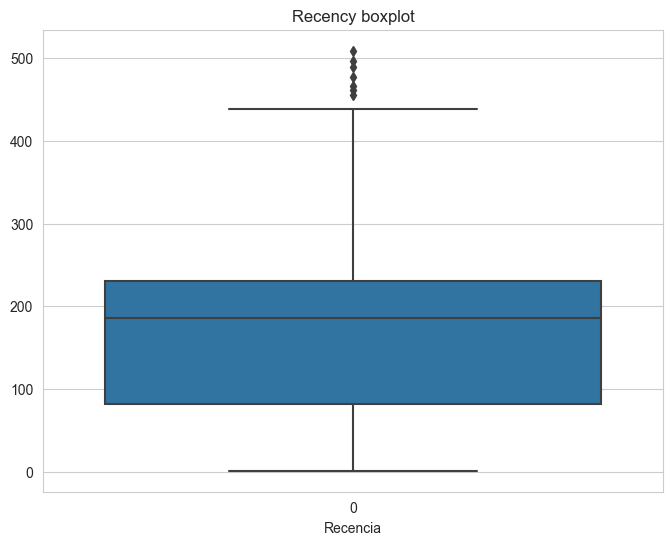

In [13]:
# Gráfico de cajas de recencia
plt.figure(figsize=(8,6))
sns.boxplot(customers_rfm["Recency"])
plt.title("Recency boxplot")
plt.xlabel("Recencia")
plt.show()

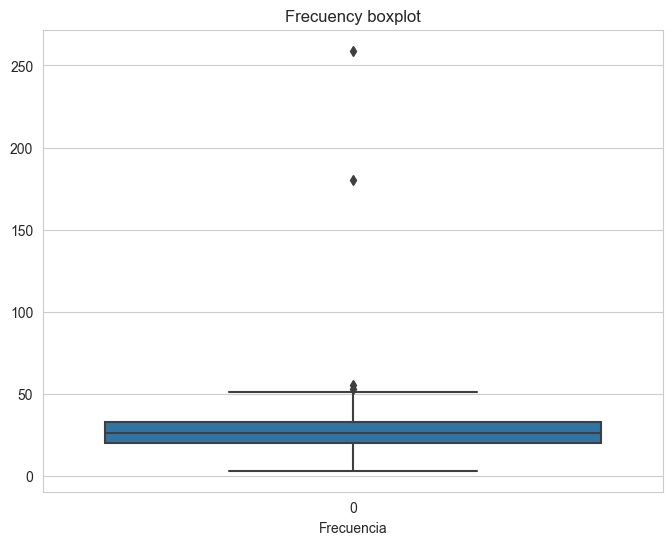

In [14]:
# Gráfico de cajas de Frecuencia
plt.figure(figsize=(8,6))
sns.boxplot(customers_rfm["Frecuency"])
plt.title("Frecuency boxplot")
plt.xlabel("Frecuencia")
plt.show()

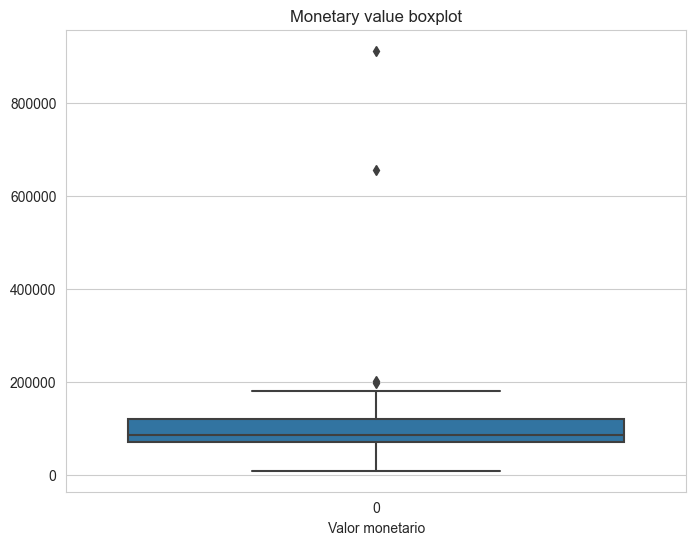

In [15]:
# Gráfico de cajas de Frecuencia
plt.figure(figsize=(8,6))
sns.boxplot(customers_rfm["Monetary value"])
plt.title("Monetary value boxplot")
plt.xlabel("Valor monetario")
plt.show()

El análisis de los gráficos brinda la siguiente información:
   - En cuanto a recencia hay clientes atípicos que no han tenido interacción con la empresa hace más de 1 año mientras que los valores típicos de recencia están en los clientes que no han tenido interacción con la empresa en un intervalo de tiempo comprendido entre 3-7 meses aproximadamente.
   - En cuanto a frecuencia hay clientes atípicos que han interactuado con la empresa más de 50 veces mientras que los valores típicos de frecuencia están en los clientes que han interactuado con la empresa un rango de 25-35 veces aproximadamente.
   - En cuanto a valor monetario hay clientes atípicos que han gastado sumas de dinero superiores a los 200000 mientras que los valores típicos se encuentran entre 80000-120000 aproximadamente.

## Relaciones entre las variables

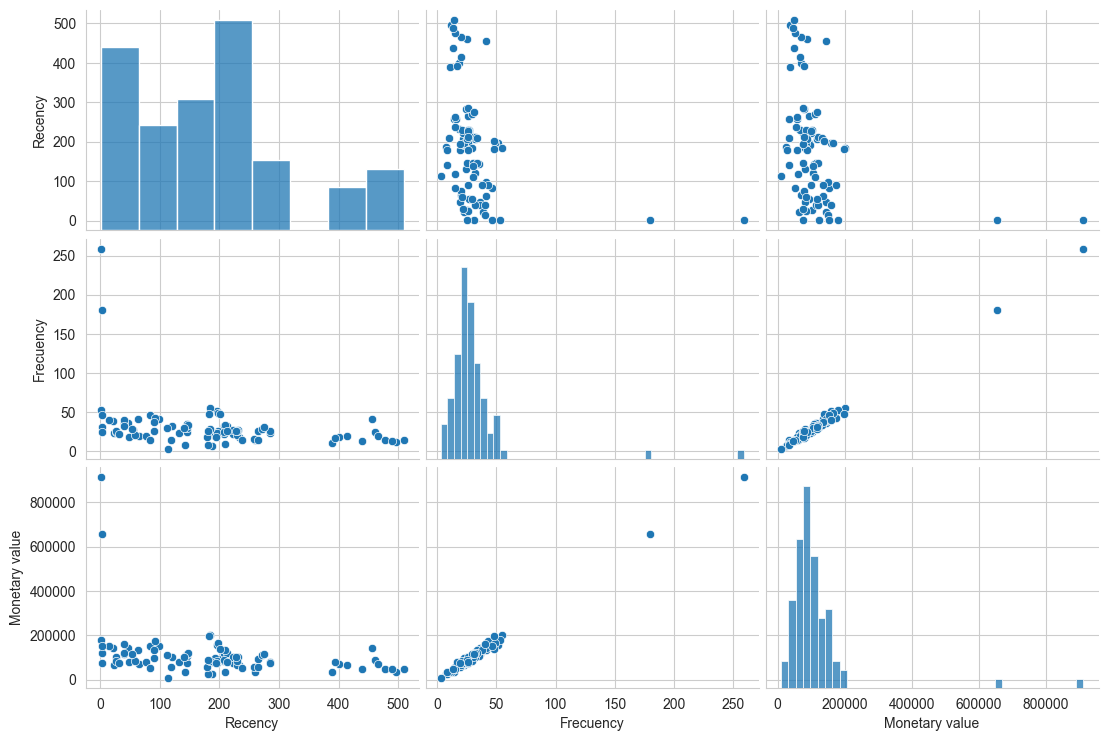

In [16]:
sns.pairplot(data=customers_rfm, aspect=1.5)
plt.show()

## Preprocesamiento de los datos

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Se procede a estandarizar los datos para centrar los datos y eliminar la influencia de la escala y la varianza de sus características, y así minimizar el sesgo causado por las diferentes escalas de las variables.

In [18]:
# Estandarización de los datos para el algoritmo de clustering k-means
scaler = StandardScaler()
customers_rfm_std = scaler.fit_transform(customers_rfm[["Recency","Frecuency","Monetary value"]])

In [19]:
# Construir un nuevo DataFrame estandarizado
customers_rfm_std = pd.DataFrame(customers_rfm_std, columns=[column for column in customers_rfm.columns if column!="Customer name"])
customers_rfm_std

,Recency,Frecuency,Monetary value
0,0.100792,0.660316,0.444432
1,-0.901470,-0.347293,-0.351497
2,0.628701,-0.152272,-0.136117
3,-0.756104,0.497798,0.409688
4,0.039585,-0.769838,-0.773606
...,...,...,...
87,0.705209,0.010246,0.078967
88,0.192602,-0.184775,-0.191501
89,0.085490,-0.379796,-0.303493
90,2.342492,-0.574817,-0.573942


## Clustering
Para determinar el número óptimo de clusters se va a utilizar el método del codo (elbow method) para evaluar la varianza dentro de los clusters en función de la cantidad de clusters utilizada.

C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

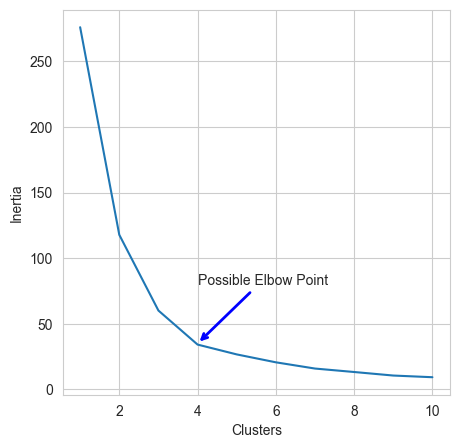

In [20]:
inertia_list = []

# Primero se va a calcular la incercia (suma de las distancias cuadradas de cada punto de los datos
# al centroide más cercano). Mientras menor sea el valor de inercia mejor será el ajuste del modelo
# a los datos.

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(customers_rfm_std)
    inertia_list.append(km.inertia_)

fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(x=list(range(1, 11)), y=inertia_list, ax=ax)
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, 35), xytext=(4, 80), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

Se obtuvo un valor candidato de k. Para k=4 se procede a visualizar los gráficos resultantes para este valor.

In [21]:
km = KMeans(n_clusters=4).fit(customers_rfm_std)
customers_rfm_std['Labels'] = km.labels_
customers_rfm['Labels'] = km.labels_

C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


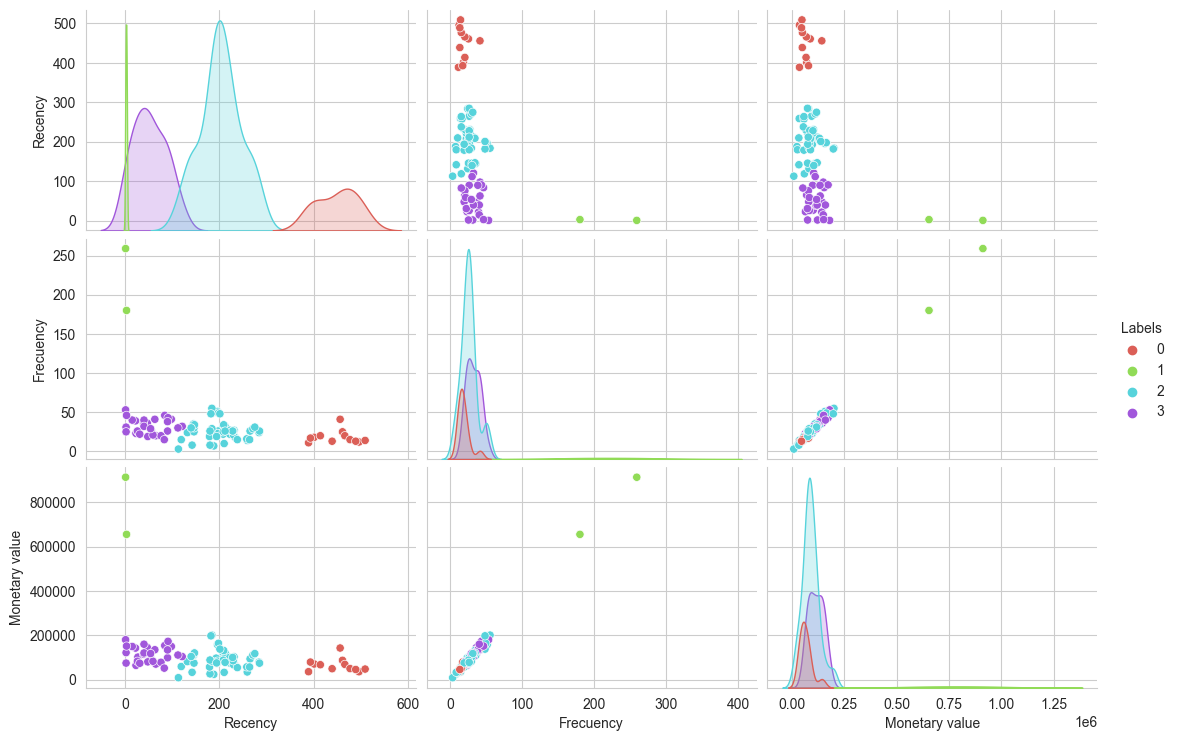

In [22]:
# Ahora se visualiza nuevamente las relaciones de las variables después de realizada la segmentación
sns.pairplot(data=customers_rfm, aspect=1.5, hue='Labels', palette=sns.color_palette('hls', 4))
plt.show()

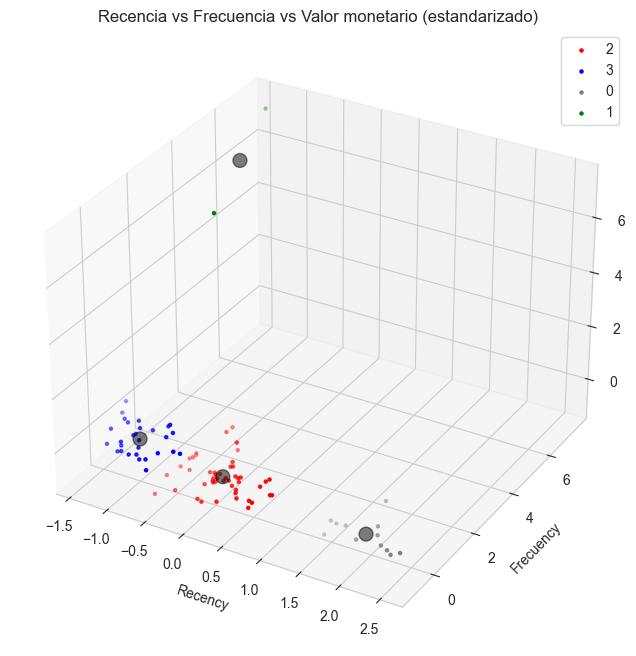

In [23]:
plt.figure(figsize=(8,8))
axes = plt.axes(projection='3d')
axes.set_title('Recencia vs Frecuencia vs Valor monetario (estandarizado)')

t_colores = ('red','blue','gray','green')
for i, categoria in enumerate(customers_rfm_std['Labels'].unique()):
    axes.scatter3D(customers_rfm_std['Recency'][customers_rfm_std['Labels']==categoria],
                   customers_rfm_std['Frecuency'][customers_rfm_std['Labels']==categoria],
                   customers_rfm_std['Monetary value'][customers_rfm_std['Labels']==categoria],
                   s=5,c=t_colores[i],label=categoria)

axes.set_xlabel('Recency')
axes.set_ylabel('Frecuency')
axes.set_zlabel('Monetary value')
plt.legend(loc='best')

# Junto con los datos separados en 4 clusters se van a visualizar los centroides de cada grupo
centers = km.cluster_centers_
axes.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=100, alpha=0.5)
plt.show()

Al analizar los gráficos con 4 clusters los grupos se pueden evaluar de la siguiente forma:
   - Label 0: Clientes con una interacción y gastos promedio pero que hace mucho tiempo no interactúan con la empresa.
   - Label 1: Clientes con una interacción y gastos promedio, y que han interactuado con la empresa recientemente.
   - Label 2: Clientes con una interacción y gastos elevados, y que han interactuado con la empresa recientemente.
   - Label 3: Clientes con una interacción y gastos promedio pero que ha pasado un tiempo desde su última interacción con la empresa.

## Validación del modelo
El modelo se va a validar siguiendo el criterio de las siguientes métricas:
   - Coeficiente de silueta.
   - Índice Dunn

In [24]:
# Coeficiente de silueta
from sklearn.metrics import silhouette_score
silueta = silhouette_score(customers_rfm_std.drop(['Labels'], axis=1), km.labels_)
print("Coeficiente de silueta:",silueta)

Coeficiente de silueta: 0.4806143270908034


El valor de coeficiente de silueta obtenido indica que la clasificación y separación de los puntos entre los clusters es relativamente buena. En particular, el valor obtenido sugiere que los puntos dentro de cada cluster están más cerca de los puntos del mismo cluster en comparación con los puntos de clusters vecinos, lo cual indica que los datos se han agrupado adecuadamente y los clusters están bien separados.

In [25]:
# Índice Dunn

# Como no hay una herramienta que tenga implementada el cálculo del índice Dunn como métrica de
# evalucación en el modelo clustering se va a calcular utilizando las bibliotecas NumPy y sklearn
from sklearn.metrics import pairwise_distances

def dunn_score(X, labels):
    # Obtener el número de clusters
    clusters = len(np.unique(labels))

    # Calcular las distancias intra-cluster
    intra_distances = np.zeros(clusters)
    for cluster in range(clusters):
        cluster_points = X[labels==cluster]
        intra_distances[cluster] = pairwise_distances(cluster_points).mean()

    # Calcular las distancias inter-cluster
    inter_distances = pairwise_distances(X).max()

    dunn = inter_distances/np.max(intra_distances)
    return dunn

dunn = dunn_score(customers_rfm_std.drop(['Labels'], axis=1), km.labels_)
print("Índice Dunn:",dunn)

Índice Dunn: 6.865759924035954


El valor obtenido del índice Dunn sugiere que los grupos formados por el modelo K-means para la segmentación de los clientes están bien definidos y separados entre sí e indica una buena calidad en la segmentación.

## Actividad de los clientes en el último año
En el análisis realizado se obtuvo un comportamiento de los clientes a nivel global. A partir de los resultados obtenidos se va a realizar un análisis local centrado en las interacciones de los clientes en el último año.

In [26]:
customers["ORDERDATE"].max()

Timestamp('2005-05-31 00:00:00')

La última interacción con la empresa ocurrió el 31 de mayo del 2005, así que el análisis se va a realizar con los clientes cuya última interacción registrada ocurrió dentro del año 2005.

In [27]:
# Obtener el dataframe con las interacciones realizadas en el año 2005
customers_2005 = customers[customers["YEAR_ID"]==2005]
customers_2005

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
22,10375,21,34.91,12,733.11,2005-02-03,Shipped,1,2,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
23,10388,42,76.36,4,3207.12,2005-03-03,Shipped,1,3,2005,...,1785 First Street,NaN,New Bedford,MA,50553,USA,NaN,Benitez,Violeta,Medium
24,10403,24,100.00,7,2434.56,2005-04-08,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Small
25,10417,66,100.00,2,7516.08,2005-05-13,Disputed,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
49,10369,41,100.00,2,4514.92,2005-01-20,Shipped,1,1,2005,...,7825 Douglas Av.,NaN,Brickhaven,MA,58339,USA,NaN,Nelson,Allen,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,10415,42,57.61,3,2419.62,2005-05-09,Disputed,2,5,2005,...,7 Allen Street,NaN,Glen Waverly,Victoria,3150,Australia,APAC,Connery,Sean,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


## Feature engineering en el nuevo periodo de tiempo

In [28]:
# Se aplica nuevamente el análisis RFM para el DataFrame obtenido
# Recencia
fecha_actual = customers_2005["ORDERDATE"].max() + dt.timedelta(days=1)
recency = customers_2005.groupby("CUSTOMERNAME")["ORDERDATE"].apply(lambda x: (fecha_actual - x.max()).days)

# Frecuencia
frecuency = customers_2005.groupby("CUSTOMERNAME")["ORDERNUMBER"].count()

# Valor Monetario
monetary_value = customers_2005.groupby(["CUSTOMERNAME"])["SALES"].sum()

# DataFrame resultante
data = {
    "Customer name": recency.index,
    "Recency": recency.values,
    "Frecuency": frecuency.values,
    "Monetary value": monetary_value.values
}

customers_2005_rfm = pd.DataFrame(data)
customers_2005_rfm

,Customer name,Recency,Frecuency,Monetary value
0,Alpha Cognac,65,5,15139.12
1,"Anna's Decorations, Ltd",84,19,65012.42
2,"Australian Collectables, Ltd",23,5,14378.09
3,"Australian Gift Network, Co",119,6,21730.03
4,Auto Canal Petit,55,3,14066.80
5,Boards & Toys Co.,113,1,3987.20
6,Collectables For Less Inc.,132,8,31474.78
7,Corporate Gift Ideas Co.,98,13,54203.62
8,Danish Wholesale Imports,47,3,26012.87
9,Diecast Classics Inc.,2,2,6166.80


## Nuevo enfoque
Se va a realizar un nuevo enfoque en el análisis donde a cada valor RFM se le va a asignar un puntaje o calificación en la escala de 1-5 y se van a adicionar esos datos al DataFrame anterior

In [29]:
# Nuevo enfoque del análisis orientado al puntaje de RFM en la escala de 1-5
r = pd.qcut(customers_2005_rfm["Recency"], q=5, labels=range(5,0,-1)) # Mientras mayor recencia menor puntaje
f = pd.qcut(customers_2005_rfm["Frecuency"], q=5, labels=range(1,6))
m = pd.qcut(customers_2005_rfm["Monetary value"], q=5, labels=range(1,6))

# Construcción del DataFrame
customers_2005_rfm = customers_2005_rfm.assign(R_score=r, F_score=f, M_score=m)
# Como los datos de las columnas R/F/M_score son de tipo categórico se transforman a tipo de dato int para tenerlos en cuenta durante la segmentación
customers_2005_rfm["R_score"] = customers_2005_rfm["R_score"].astype(int)
customers_2005_rfm["F_score"] = customers_2005_rfm["F_score"].astype(int)
customers_2005_rfm["M_score"] = customers_2005_rfm["M_score"].astype(int)
customers_2005_rfm["RFM_score"] = customers_2005_rfm["R_score"] + customers_2005_rfm["F_score"] + customers_2005_rfm["M_score"]
customers_2005_rfm

,Customer name,Recency,Frecuency,Monetary value,R_score,F_score,M_score,RFM_score
0,Alpha Cognac,65,5,15139.12,3,2,2,7
1,"Anna's Decorations, Ltd",84,19,65012.42,2,5,5,12
2,"Australian Collectables, Ltd",23,5,14378.09,4,2,2,8
3,"Australian Gift Network, Co",119,6,21730.03,2,3,2,7
4,Auto Canal Petit,55,3,14066.80,3,1,2,6
5,Boards & Toys Co.,113,1,3987.20,2,1,1,4
6,Collectables For Less Inc.,132,8,31474.78,1,3,3,7
7,Corporate Gift Ideas Co.,98,13,54203.62,2,4,5,11
8,Danish Wholesale Imports,47,3,26012.87,4,1,2,7
9,Diecast Classics Inc.,2,2,6166.80,5,1,1,7


## Visualización de los datos analizados en el nuevo periodo de tiempo

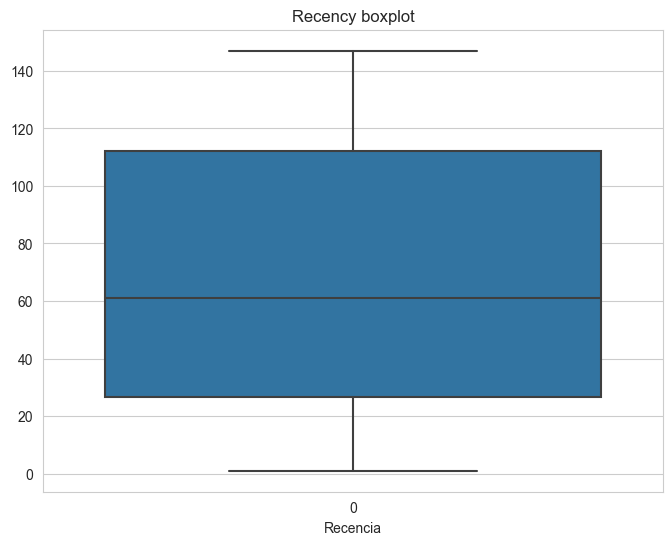

In [30]:
# Gráfico de cajas de recencia
plt.figure(figsize=(8, 6))
sns.boxplot(customers_2005_rfm["Recency"])
plt.title("Recency boxplot")
plt.xlabel("Recencia")
plt.show()

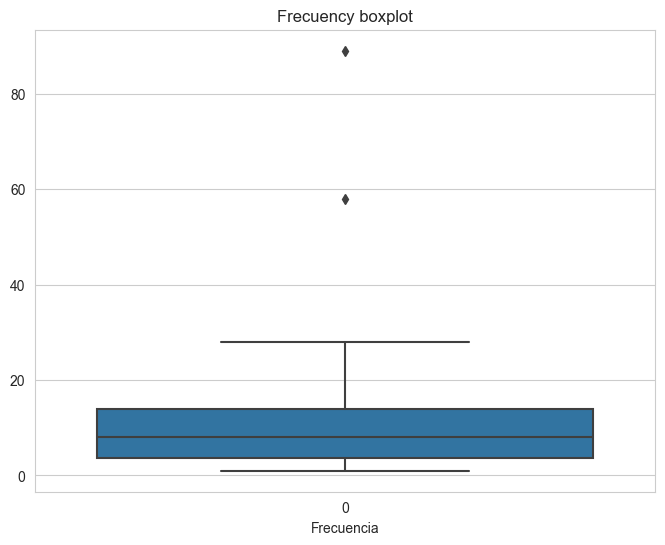

In [31]:
# Gráfico de cajas de Frecuencia
plt.figure(figsize=(8, 6))
sns.boxplot(customers_2005_rfm["Frecuency"])
plt.title("Frecuency boxplot")
plt.xlabel("Frecuencia")
plt.show()

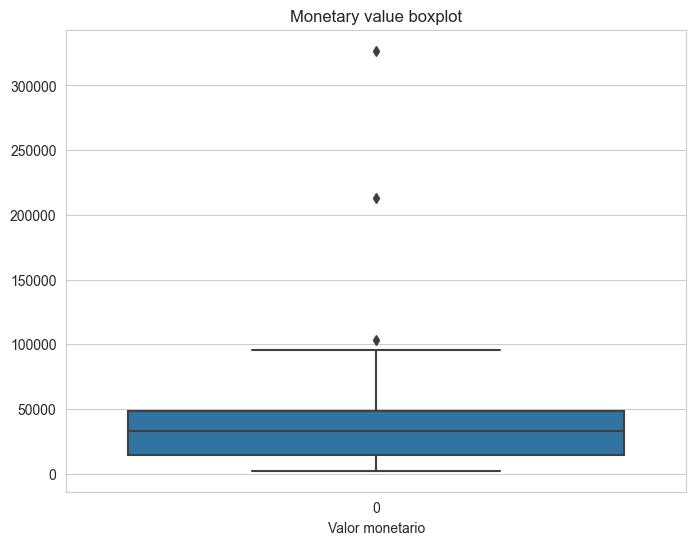

In [32]:
# Gráfico de cajas de Frecuencia
plt.figure(figsize=(8, 6))
sns.boxplot(customers_2005_rfm["Monetary value"])
plt.title("Monetary value boxplot")
plt.xlabel("Valor monetario")
plt.show()

El análisis de los gráficos en el nuevo periodo de tiempo brinda la siguiente información:
   - En cuanto a recencia la mayoría de los clientes ha interactuado con la empresa entre 1 mes y 4 meses y medio aproximadamente, mientras que el 25% de los clientes interactuó con la empresa en menos de un mes.
   - En cuanto a frecuencia hay clientes atípicos que al igual que en análisis global han interactuado con la empresa más de 50 veces, mientras que los valores típicos de frecuencia están en los clientes que han interactuado con la empresa un rango de 5-15 veces aproximadamente.
   - En cuanto a valor monetario hay clientes atípicos que han gastado sumas de dinero superiores a los 100000 mientras que los valores típicos se encuentran entre 20000-50000 aproximadamente.

## Relación de las variables en el nuevo periodo de tiempo

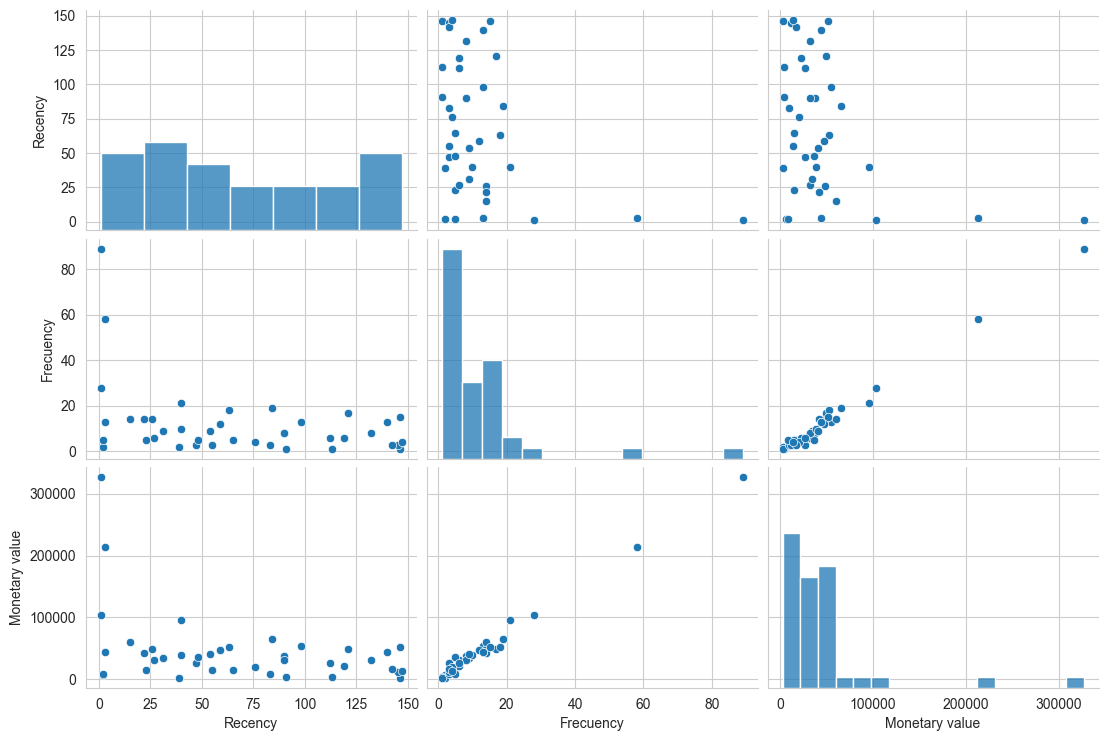

In [33]:
sns.pairplot(data=customers_2005_rfm[customers_2005_rfm.columns[1:4]], aspect=1.5)
plt.show()

## Preprocesamiento y Clustering

In [34]:
# Preprocesamiento de los datos
# Estandarización de los datos para el algoritmo de clustering k-means
scaler = StandardScaler()
customers_2005_rfm_std = scaler.fit_transform(customers_2005_rfm[customers_2005_rfm.columns[1:4].values])
customers_2005_rfm_std

array([[-7.30933160e-02, -4.39866810e-01, -5.12074918e-01],
       [ 3.20884841e-01,  4.46195829e-01,  3.49326353e-01],
       [-9.43992400e-01, -4.39866810e-01, -5.25219270e-01],
       [ 1.04663408e+00, -3.76576622e-01, -3.98238090e-01],
       [-2.80450241e-01, -5.66447187e-01, -5.30595806e-01],
       [ 9.22219923e-01, -6.93027564e-01, -7.04688562e-01],
       [ 1.31619808e+00, -2.49996245e-01, -2.29928794e-01],
       [ 6.11184536e-01,  6.64546980e-02,  1.62639006e-01],
       [-4.46335781e-01, -5.66447187e-01, -3.24265768e-01],
       [-1.37944194e+00, -6.29737376e-01, -6.67042964e-01],
       [ 4.66034689e-01, -6.93027564e-01, -7.01434556e-01],
       [-1.40017764e+00,  4.87650903e+00,  4.87083541e+00],
       [ 4.45298996e-01, -2.49996245e-01, -1.24866555e-01],
       [-8.61049630e-01, -3.76576622e-01, -2.26928856e-01],
       [-8.81785323e-01,  1.29744886e-01,  6.09646290e-02],
       [-6.12221321e-01, -6.29737376e-01, -7.28862508e-01],
       [-9.64728093e-01,  1.29744886e-01

In [35]:
# Construir un nuevo DataFrame estandarizado junto con el puntaje RFM
customers_2005_rfm_std = pd.DataFrame(customers_2005_rfm_std,
                                      columns=customers_2005_rfm.columns[1:4].values)
customers_2005_rfm_std = customers_2005_rfm_std.assign(R_score=customers_2005_rfm["R_score"],
                                                       F_score=customers_2005_rfm["F_score"],
                                                       M_score=customers_2005_rfm["M_score"],
                                                       RFM_score=customers_2005_rfm["RFM_score"])
customers_2005_rfm_std

,Recency,Frecuency,Monetary value,R_score,F_score,M_score,RFM_score
0,-0.073093,-0.439867,-0.512075,3,2,2,7
1,0.320885,0.446196,0.349326,2,5,5,12
2,-0.943992,-0.439867,-0.525219,4,2,2,8
3,1.046634,-0.376577,-0.398238,2,3,2,7
4,-0.280450,-0.566447,-0.530596,3,1,2,6
5,0.922220,-0.693028,-0.704689,2,1,1,4
6,1.316198,-0.249996,-0.229929,1,3,3,7
7,0.611185,0.066455,0.162639,2,4,5,11
8,-0.446336,-0.566447,-0.324266,4,1,2,7
9,-1.379442,-0.629737,-0.667043,5,1,1,7


C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

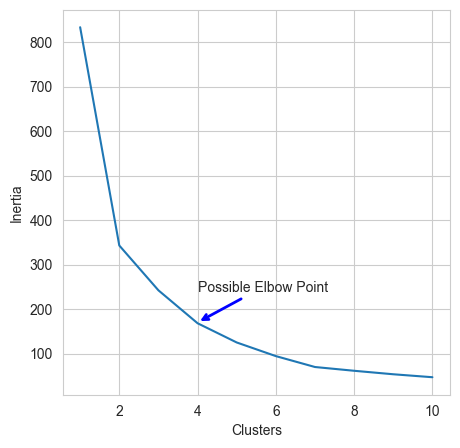

In [36]:
inertia_list = []

# Nuevamente calcular las incercias para 1 a 10 clusters

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(customers_2005_rfm_std)
    inertia_list.append(km.inertia_)

fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(x=list(range(1, 11)), y=inertia_list, ax=ax)
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, 170), xytext=(4, 240), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [37]:
km = KMeans(n_clusters=4).fit(customers_2005_rfm_std)
customers_2005_rfm_std['Labels'] = km.labels_
customers_2005_rfm['Labels'] = km.labels_

C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


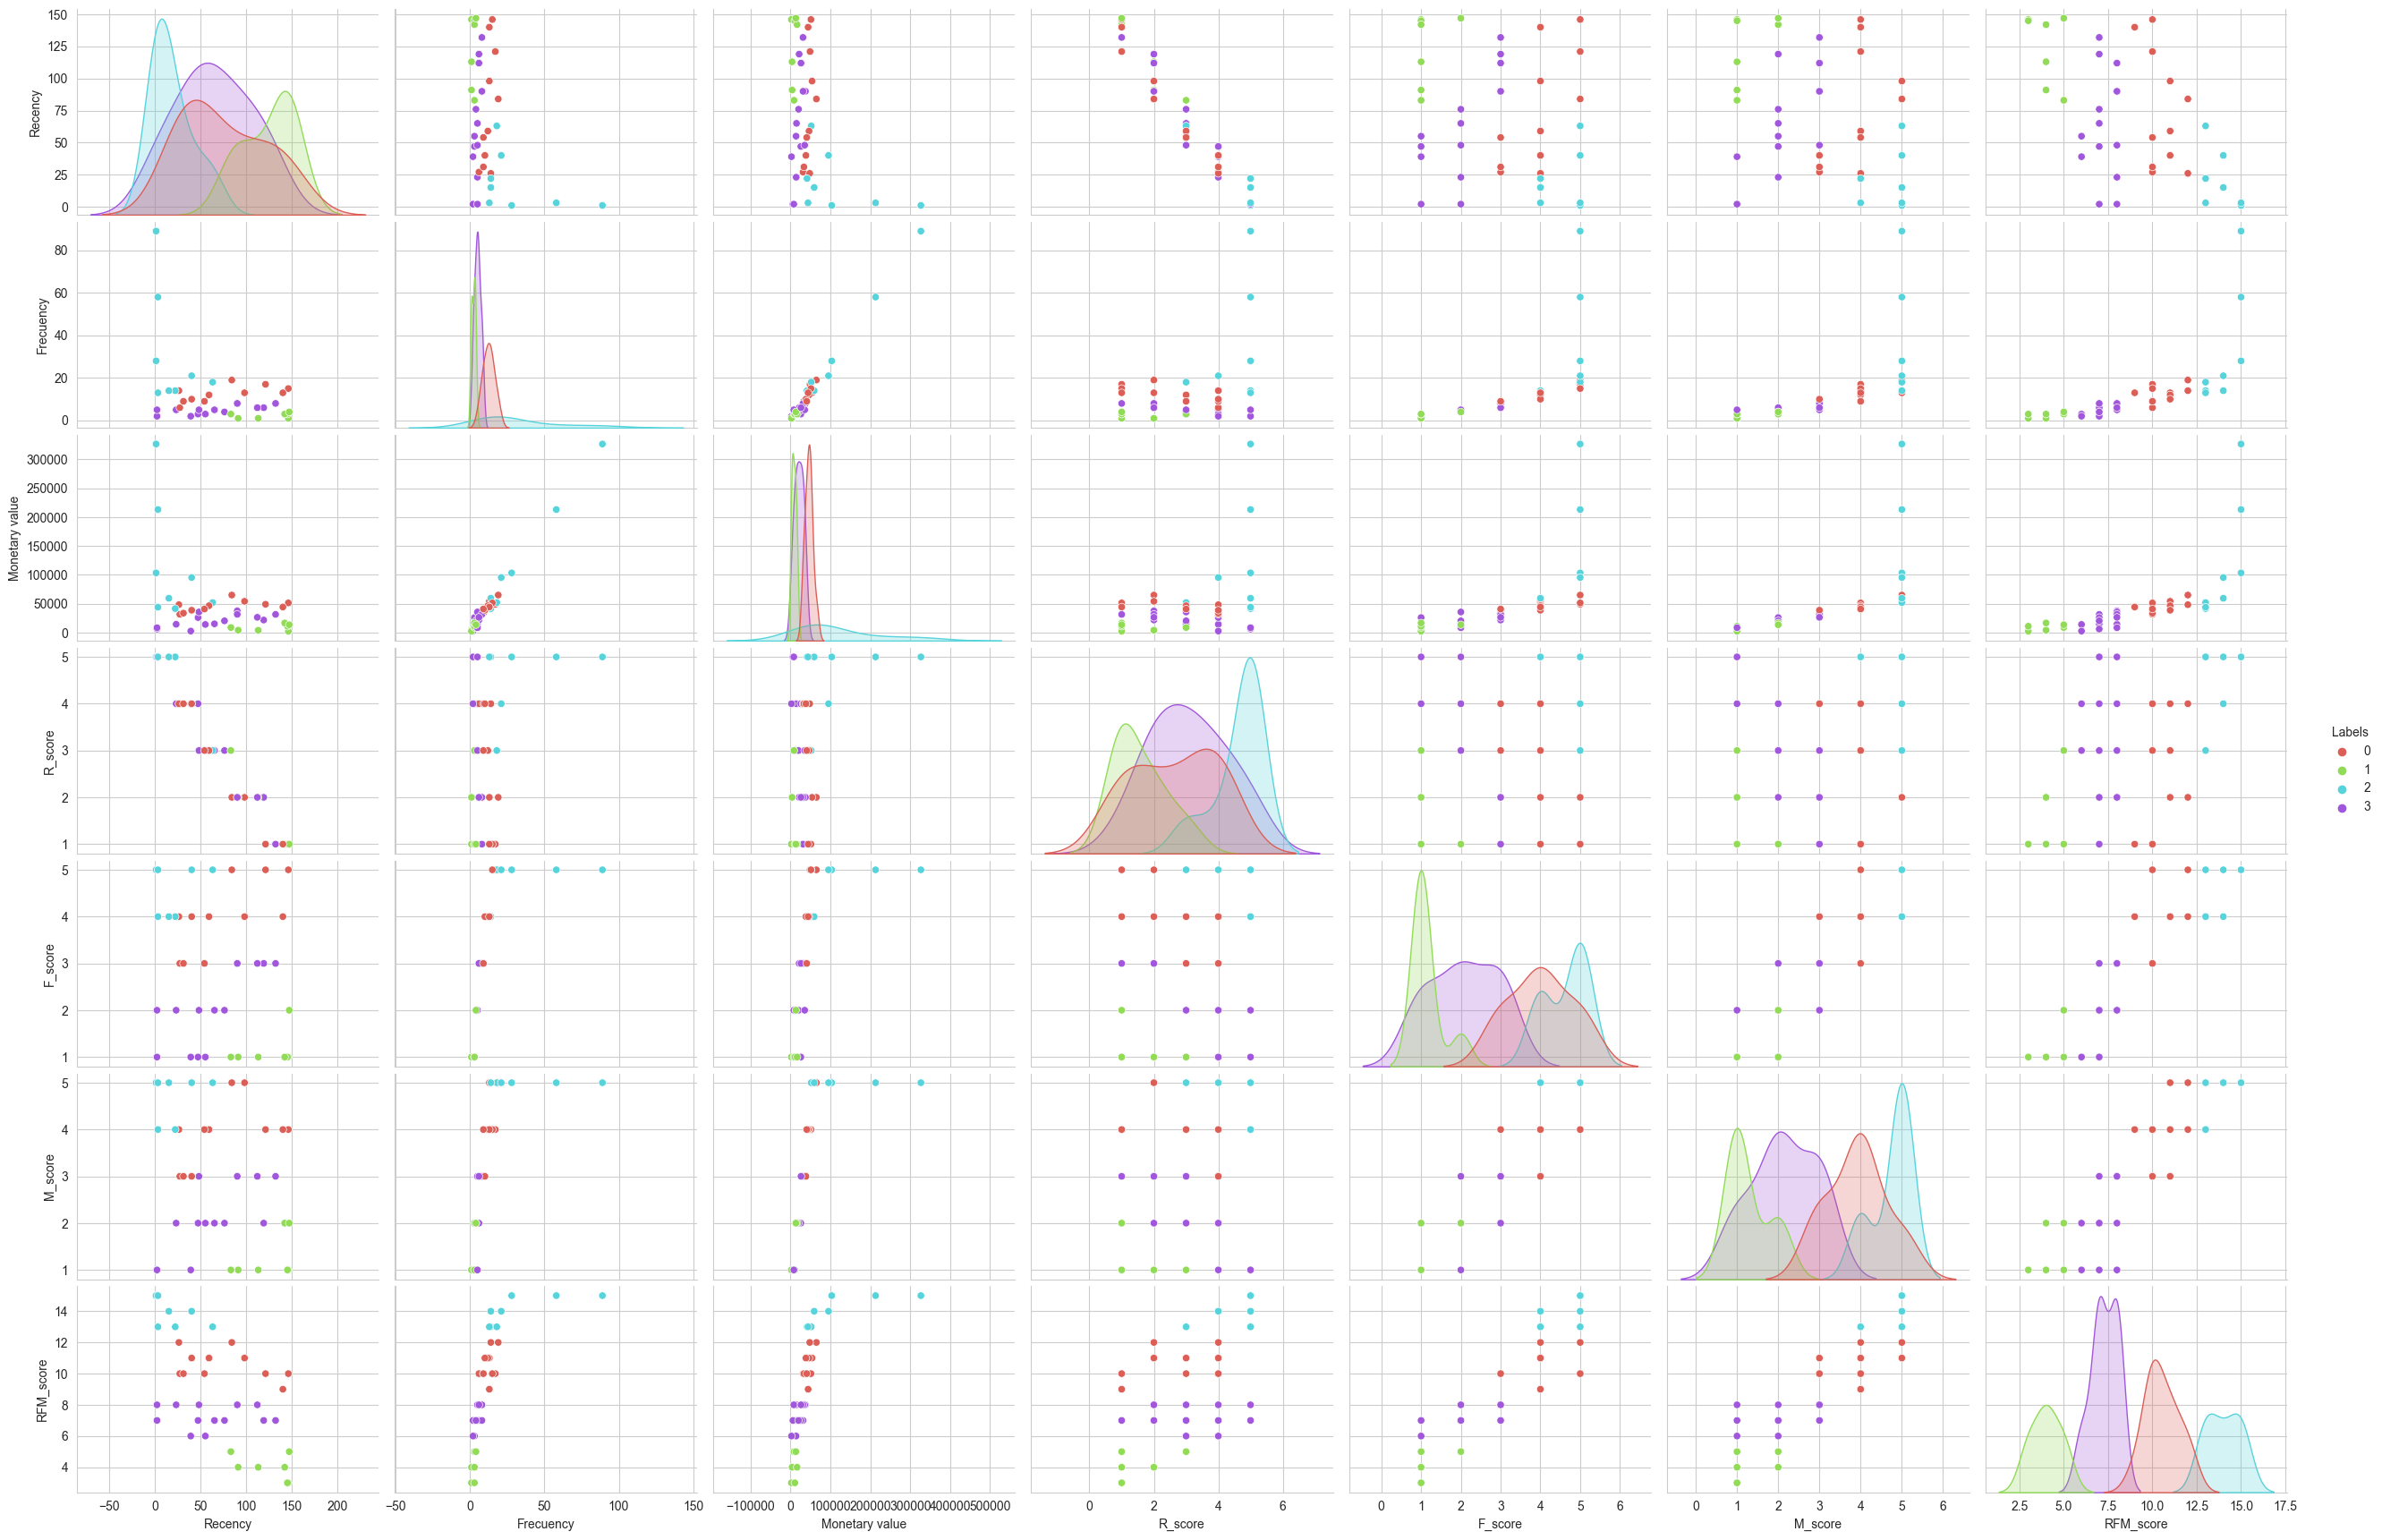

In [38]:
# Ahora se visualiza nuevamente las relaciones de las variables después de realizada la segmentación
sns.pairplot(data=customers_2005_rfm, aspect=1.5, hue='Labels', palette=sns.color_palette('hls', 4))
plt.show()

Se harán varios gráficos tipo swarmplot de los grupos de clientes en función de los puntajes RFM para visualizar mejor el agrupamiento de los clientes en el eje categórico referido a los grupos obtenidos.

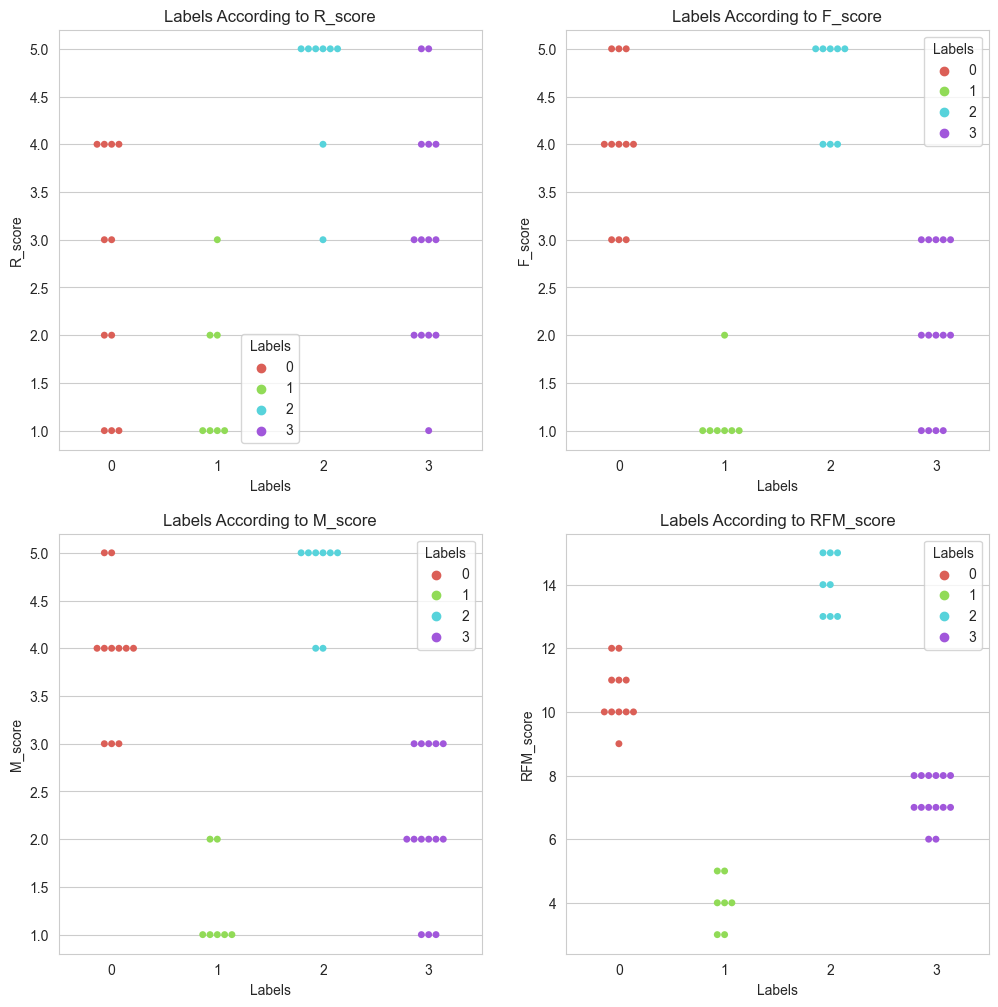

In [39]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
for i, score in enumerate(customers_2005_rfm.columns[4:8]):
    sns.swarmplot(data=customers_2005_rfm, x='Labels', y=score, ax=axes[i//2][i%2],
                  hue='Labels', palette=sns.color_palette('hls',4))
    ax=axes[i//2][i%2].set_title(f'Labels According to {score}')
plt.show()


Al analizar los gráficos con 4 clusters siguiendo el nuevo enfoque los grupos se pueden evaluar de la siguiente forma:
   - Label 0: Clientes prometedores.
   - Label 1: Clientes perdidos.
   - Label 2: Mejores clientes.
   - Label 3: Clientes en peligro.

## Validación del modelo

In [40]:
# Coeficiente de silueta
silueta = silhouette_score(customers_2005_rfm_std.drop(['Labels'], axis=1), km.labels_)
print("Coeficiente de silueta:",silueta)

Coeficiente de silueta: 0.3756498432955979


El nuevo valor de coeficiente de silueta obtenido indica que la clasificación y separación de los puntos entre los clusters es relativamente buena. Sugiere que los puntos dentro de cada cluster están más cerca de los puntos del mismo cluster en comparación con los puntos de clusters vecinos, lo cual indica que los datos se han agrupado adecuadamente y los clusters están bien separados.

In [41]:
# Índice Dunn
dunn = dunn_score(customers_2005_rfm_std.drop(['Labels'], axis=1), km.labels_)
print("Índice Dunn:",dunn)

Índice Dunn: 5.221398707525173


El nuevo valor obtenido del índice Dunn sugiere que los grupos formados por el modelo K-means para la segmentación de los clientes están bien definidos y separados entre sí e indica una buena calidad en la segmentación.

# Conclusiones
En el análisis del historial de ventas comprendido en el nuevo periodo de tiempo se utilizó un nuevo criterio para la segmentación basado en la calificación o puntaje de RFM, en el cual se puede realizar una mejor selección de los clientes según el puntaje además de los valores reales de RFM.

Después de realizada la segmentación los grupos de clientes definidos como **mejores clientes** y **clientes prometedores**, con puntajes RFM superior a 12 y comprendidos entre 9-12 respectivamente son los grupos a los que podría estar orientada la campaña de marketing en vista de aumentar los ingresos a la empresa así como fomentar la fidelidad del cliente, altamente valorada, debido a que los clientes fieles tienden a generar mayor valor a lo largo del tiempo.

Para fomentar la fidelidad del cliente se pueden implementar estrategias que incluyen programas de lealtad, atención al cliente de calidad, personalización de ofertas, promociones exclusivas para clientes leales, entre otras tácticas orientadas al aumento de ingresos.

## Recomendaciones
En vista a mejorar la calidad del proyecto tanto para tener más información acerca de los clientes como para implementar la campaña de marketing se pueden añadir los siguientes algoritmos:
1. **Predicción del gasto monetario:**
Se puede construir un modelo de regresión lineal o regresión logística para predecir el gasto monetario de un cliente en función de sus características demográficas y de ingresos. Esto ayudará a identificar a los clientes con mayor potencial de gasto y personalizar las ofertas y promociones para maximizar los ingresos.
2. **Análisis de patrones de gasto:**
Se pueden utilizar las redes neuronales recurrentes (RNN) y las redes neuronales convolucionales (CNN) para analizar y descubrir patrones secuenciales y estructurados de gasto en el conjunto de datos. Por ejemplo, se podría identificar qué grupos demográficos tienden a gastar más en ciertas categorías de productos o en determinados momentos del año. Esto permitirá tomar decisiones más informadas sobre la gestión de inventario, la planificación de promociones y la optimización de la disposición del centro comercial.
3. **Recomendación de productos:**
Se puede construir un sistema de recomendación de productos a los grupos de clientes seleccionados utilizando un modelo de filtro colaborativo basado en objetos (item-based collaborative filtering) para sugerir productos o servicios a los clientes en función de sus características demográficas y de gasto. Esto puede ayudar a aumentar las ventas cruzadas y fomentar la fidelidad del cliente al ofrecer recomendaciones personalizadas basadas en el historial de compra.

## Salvar el modelo para su posterior uso en una versión End to End

In [42]:
import pickle

with open('model.pickle', 'wb') as pickle_file:
    pickle.dump(km, pickle_file)

# Para cargar el modelo
# with open('model.pickle', 'rb') as pickle_file:
#    km = pickle.load(pickle_file)

In [43]:
import joblib

joblib.dump(km, 'model.joblib')

# Para cargarlo
# km = joblib.load('model.joblib')

['model.joblib']